In [74]:
import pandas as pd
mel = pd.read_csv("H:\Downloads\melb_house.csv", sep=",")
mel.head()


,suburb,rooms,type,price,method,seller_g,date,distance,postcode,bedroom2,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,Abbotsford,2,h,NaN,SS,Jellis,2016-09-03,2.5,3067.0,2.0,...,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.3
1,Abbotsford,2,h,1480000.0,S,Biggin,2016-12-03,2.5,3067.0,2.0,...,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.4
2,Abbotsford,2,h,1035000.0,S,Biggin,2016-02-04,2.5,3067.0,2.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.1
3,Abbotsford,3,u,NaN,VB,Rounds,2016-02-04,2.5,3067.0,3.0,...,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.1
4,Abbotsford,3,h,1465000.0,SP,Biggin,2017-03-04,2.5,3067.0,3.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.1


checklist:
groupby
lambda
graphs (scatter, count, line)

In [75]:
mel.columns
mel=mel.fillna(0)

In [76]:
mel["price_in_millions"] = mel["price"]/1000000
column_index = mel.columns.get_loc("price")
mel.insert(column_index + 1, "price_in_millions", mel.pop("price_in_millions"))
mel.head()

,suburb,rooms,type,price,price_in_millions,method,seller_g,date,distance,postcode,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,Abbotsford,2,h,0.0,0.000,SS,Jellis,2016-09-03,2.5,3067.0,...,1.0,126.0,0.0,0.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.3
1,Abbotsford,2,h,1480000.0,1.480,S,Biggin,2016-12-03,2.5,3067.0,...,1.0,202.0,0.0,0.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.4
2,Abbotsford,2,h,1035000.0,1.035,S,Biggin,2016-02-04,2.5,3067.0,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.1
3,Abbotsford,3,u,0.0,0.000,VB,Rounds,2016-02-04,2.5,3067.0,...,1.0,0.0,0.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.1
4,Abbotsford,3,h,1465000.0,1.465,SP,Biggin,2017-03-04,2.5,3067.0,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.1


In [77]:
sub_type_price = mel.groupby(["region_name","rooms"])["price_in_millions"].mean().reset_index()
sub_type_price

,region_name,rooms,price_in_millions
0,0,2,0.767500
1,0,3,0.616000
2,Eastern Metropolitan,1,0.507905
3,Eastern Metropolitan,2,0.578473
4,Eastern Metropolitan,3,0.761885
...,...,...,...
67,Western Victoria,3,0.350431
68,Western Victoria,4,0.392870
69,Western Victoria,5,0.585000
70,Western Victoria,6,0.000000


In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

Text(0.5, 1.0, 'Average price of different rooms for different regions')

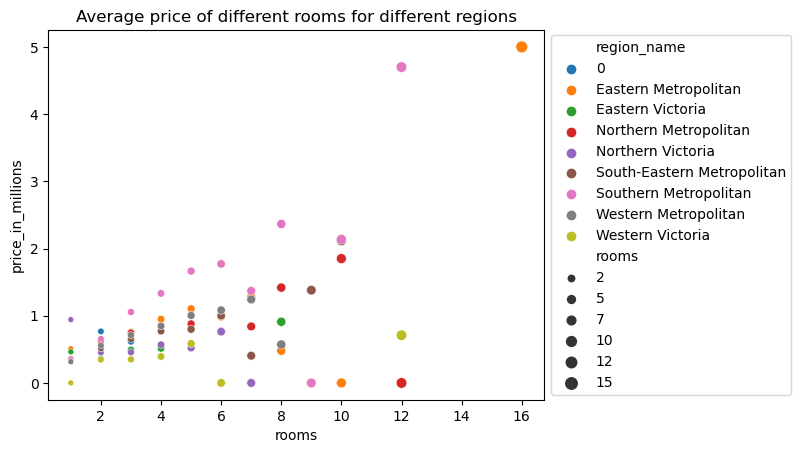

In [79]:
sns.scatterplot(x="rooms",y="price_in_millions",data=sub_type_price,size="rooms",hue="region_name")
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.title("Average price of different rooms for different regions")


In [80]:
mel[["bedroom2","bathroom","landsize"]]

,bedroom2,bathroom,landsize
0,2.0,1.0,126.0
1,2.0,1.0,202.0
2,2.0,1.0,156.0
3,3.0,2.0,0.0
4,3.0,2.0,134.0
...,...,...,...
34852,4.0,1.0,593.0
34853,2.0,2.0,98.0
34854,2.0,1.0,220.0
34855,0.0,0.0,0.0


In [81]:
pico = pd.pivot_table(mel, values=["price_in_millions","landsize"],index=["region_name","bedroom2"],aggfunc="mean",fill_value=0)
pico.reset_index()

,region_name,bedroom2,landsize,price_in_millions
0,0,0.0,0.000000,0.717000
1,Eastern Metropolitan,0.0,1.284103,0.760739
2,Eastern Metropolitan,1.0,278.277778,0.531389
3,Eastern Metropolitan,2.0,418.628947,0.596362
4,Eastern Metropolitan,3.0,523.003989,0.784160
...,...,...,...,...
72,Western Victoria,3.0,548.228571,0.357396
73,Western Victoria,4.0,620.807692,0.393558
74,Western Victoria,5.0,1130.000000,0.585000
75,Western Victoria,6.0,33000.000000,0.000000


Text(0.5, 1.0, 'Houses sold in each regions')

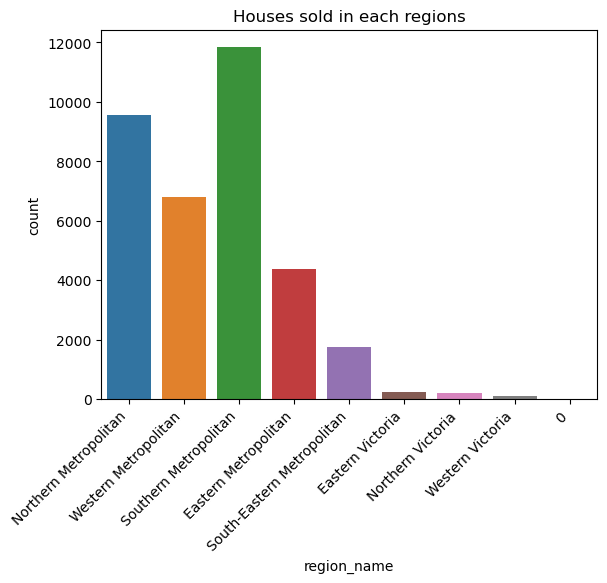

In [82]:
sns.countplot(x="region_name",data=mel)
plt.xticks(rotation=45, ha='right')
plt.title("Houses sold in each regions")

Index(['suburb', 'rooms', 'type', 'price', 'method', 'seller_g', 'date',
       'distance', 'postcode', 'bedroom2', 'bathroom', 'car', 'landsize',
       'building_area', 'year_built', 'council_area', 'latitude', 'longitude',
       'region_name', 'property_count', 'yr_qtr'],
      dtype='object')

In [83]:
mel["type_name"] = mel["type"].apply(lambda x: "house" if x == "h" else "unit/appartment" if x == "u" else "town house" if x == "t" else x)
column_index2 = mel.columns.get_loc("type")
mel.insert(column_index2 + 1, "type_name", mel.pop("type_name"))
mel.head()



,suburb,rooms,type,type_name,price,price_in_millions,method,seller_g,date,distance,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,Abbotsford,2,h,house,0.0,0.000,SS,Jellis,2016-09-03,2.5,...,1.0,126.0,0.0,0.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.3
1,Abbotsford,2,h,house,1480000.0,1.480,S,Biggin,2016-12-03,2.5,...,1.0,202.0,0.0,0.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.4
2,Abbotsford,2,h,house,1035000.0,1.035,S,Biggin,2016-02-04,2.5,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.1
3,Abbotsford,3,u,unit/appartment,0.0,0.000,VB,Rounds,2016-02-04,2.5,...,1.0,0.0,0.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.1
4,Abbotsford,3,h,house,1465000.0,1.465,SP,Biggin,2017-03-04,2.5,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.1


In [84]:
mel["date"] = pd.to_datetime(mel["date"])



Text(0.5, 1.0, 'House prices fluctuation throughout years')

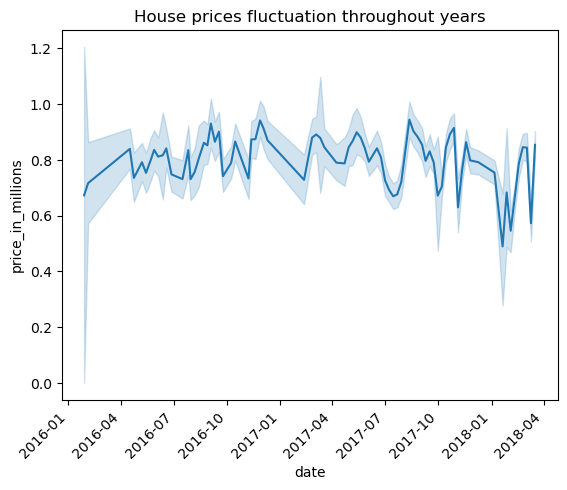

In [85]:
sns.lineplot(x="date",y="price_in_millions",data=mel)
plt.xticks(rotation=45, ha='right')
plt.title("House prices fluctuation throughout years")

<AxesSubplot:xlabel='type_name', ylabel='count'>

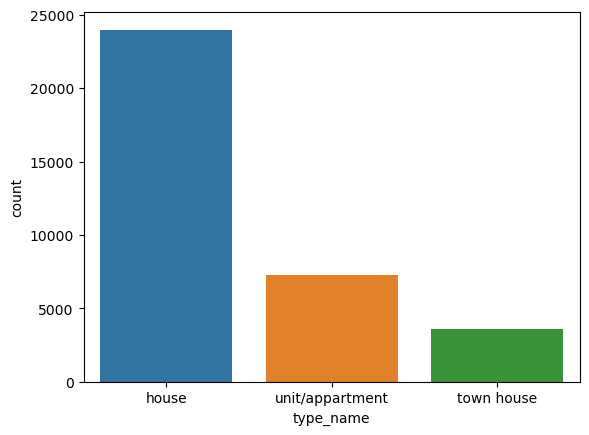

In [86]:
sns.countplot(x="type_name",data=mel)

In [87]:
1+1

2

In [88]:
mel.head()

,suburb,rooms,type,type_name,price,price_in_millions,method,seller_g,date,distance,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,Abbotsford,2,h,house,0.0,0.000,SS,Jellis,2016-09-03,2.5,...,1.0,126.0,0.0,0.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.3
1,Abbotsford,2,h,house,1480000.0,1.480,S,Biggin,2016-12-03,2.5,...,1.0,202.0,0.0,0.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.4
2,Abbotsford,2,h,house,1035000.0,1.035,S,Biggin,2016-02-04,2.5,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.1
3,Abbotsford,3,u,unit/appartment,0.0,0.000,VB,Rounds,2016-02-04,2.5,...,1.0,0.0,0.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.1
4,Abbotsford,3,h,house,1465000.0,1.465,SP,Biggin,2017-03-04,2.5,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.1


In [89]:
melted_dataframe = mel.melt(id_vars=["suburb", "type_name", "price", "date"], value_vars=["car", "landsize", "building_area"], var_name="property_attribute", value_name="attribute_value")
melted_dataframe


,suburb,type_name,price,date,property_attribute,attribute_value
0,Abbotsford,house,0.0,2016-09-03,car,1.0
1,Abbotsford,house,1480000.0,2016-12-03,car,1.0
2,Abbotsford,house,1035000.0,2016-02-04,car,0.0
3,Abbotsford,unit/appartment,0.0,2016-02-04,car,1.0
4,Abbotsford,house,1465000.0,2017-03-04,car,0.0
...,...,...,...,...,...,...
104566,Yarraville,house,1480000.0,2018-02-24,building_area,0.0
104567,Yarraville,house,888000.0,2018-02-24,building_area,104.0
104568,Yarraville,town house,705000.0,2018-02-24,building_area,120.0
104569,Yarraville,house,1140000.0,2018-02-24,building_area,0.0


In [90]:
mel.dtypes

suburb                       object
rooms                         int64
type                         object
type_name                    object
price                       float64
price_in_millions           float64
method                       object
seller_g                     object
date                 datetime64[ns]
distance                    float64
postcode                    float64
bedroom2                    float64
bathroom                    float64
car                         float64
landsize                    float64
building_area               float64
year_built                  float64
council_area                 object
latitude                    float64
longitude                   float64
region_name                  object
property_count              float64
yr_qtr                      float64
dtype: object

In [91]:
mel[["suburb","price_in_millions","rooms"]]

,suburb,price_in_millions,rooms
0,Abbotsford,0.000,2
1,Abbotsford,1.480,2
2,Abbotsford,1.035,2
3,Abbotsford,0.000,3
4,Abbotsford,1.465,3
...,...,...,...
34852,Yarraville,1.480,4
34853,Yarraville,0.888,2
34854,Yarraville,0.705,2
34855,Yarraville,1.140,3


In [92]:
mel["region_name"].unique()

array(['Northern Metropolitan', 'Western Metropolitan',
       'Southern Metropolitan', 'Eastern Metropolitan',
       'South-Eastern Metropolitan', 'Eastern Victoria',
       'Northern Victoria', 'Western Victoria', 0], dtype=object)

In [93]:
northern = sub_type_price[sub_type_price["region_name"]=="Northern Metropolitan"]
northern_highlight = northern.style.highlight_max(subset=["price_in_millions"], color="red").highlight_min(subset=["price_in_millions"], color="blue")
northern_highlight

,region_name,rooms,price_in_millions
20,Northern Metropolitan,1,0.352914
21,Northern Metropolitan,2,0.620586
22,Northern Metropolitan,3,0.748515
23,Northern Metropolitan,4,0.848861
24,Northern Metropolitan,5,0.878417
25,Northern Metropolitan,6,0.766058
26,Northern Metropolitan,7,0.840300
27,Northern Metropolitan,8,1.418650
28,Northern Metropolitan,10,1.850000
29,Northern Metropolitan,12,0.000000


In [94]:
contingency_table = pd.crosstab(mel["region_name"],mel["type_name"])
contingency_table

type_name,house,town house,unit/appartment
region_name,,,
0,2,0,1
Eastern Metropolitan,3438,391,548
Eastern Victoria,216,5,7
Northern Metropolitan,6489,1035,2033
Northern Victoria,199,1,3
South-Eastern Metropolitan,1356,162,221
Southern Metropolitan,6968,1332,3536
Western Metropolitan,5199,654,946
Western Victoria,113,0,2


In [95]:
contingency_table.style.background_gradient(subset=["house"])

type_name,house,town house,unit/appartment
region_name,,,
0,2,0,1
Eastern Metropolitan,3438,391,548
Eastern Victoria,216,5,7
Northern Metropolitan,6489,1035,2033
Northern Victoria,199,1,3
South-Eastern Metropolitan,1356,162,221
Southern Metropolitan,6968,1332,3536
Western Metropolitan,5199,654,946
Western Victoria,113,0,2


In [96]:
mel_iloc= mel.iloc[:5,5:]
mel_iloc

,price_in_millions,method,seller_g,date,distance,postcode,bedroom2,bathroom,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,0.000,SS,Jellis,2016-09-03,2.5,3067.0,2.0,1.0,1.0,126.0,0.0,0.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.3
1,1.480,S,Biggin,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,0.0,0.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.4
2,1.035,S,Biggin,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.1
3,0.000,VB,Rounds,2016-02-04,2.5,3067.0,3.0,2.0,1.0,0.0,0.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.1
4,1.465,SP,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.1


In [97]:
iloc_sort = mel_iloc.sort_values(by="price_in_millions",ascending=False)
iloc_sort

,price_in_millions,method,seller_g,date,distance,postcode,bedroom2,bathroom,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
1,1.480,S,Biggin,2016-12-03,2.5,3067.0,2.0,1.0,1.0,202.0,0.0,0.0,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,2016.4
4,1.465,SP,Biggin,2017-03-04,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,2017.1
2,1.035,S,Biggin,2016-02-04,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,2016.1
0,0.000,SS,Jellis,2016-09-03,2.5,3067.0,2.0,1.0,1.0,126.0,0.0,0.0,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,2016.3
3,0.000,VB,Rounds,2016-02-04,2.5,3067.0,3.0,2.0,1.0,0.0,0.0,0.0,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0,2016.1


In [98]:
counts = mel[["region_name", "type_name"]].value_counts().reset_index(name="count")
counts 

,region_name,type_name,count
0,Southern Metropolitan,house,6968
1,Northern Metropolitan,house,6489
2,Western Metropolitan,house,5199
3,Southern Metropolitan,unit/appartment,3536
4,Eastern Metropolitan,house,3438
5,Northern Metropolitan,unit/appartment,2033
6,South-Eastern Metropolitan,house,1356
7,Southern Metropolitan,town house,1332
8,Northern Metropolitan,town house,1035
9,Western Metropolitan,unit/appartment,946


In [99]:
selected_regions = ["Northern Metropolitan", "Southern Metropolitan"]
filtered_mel = mel[mel["region_name"].isin(selected_regions)]
filtered_mel

,suburb,rooms,type,type_name,price,price_in_millions,method,seller_g,date,distance,...,car,landsize,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,Abbotsford,2,h,house,0.0,0.000,SS,Jellis,2016-09-03,2.5,...,1.0,126.0,0.0,0.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,2016.3
1,Abbotsford,2,h,house,1480000.0,1.480,S,Biggin,2016-12-03,2.5,...,1.0,202.0,0.0,0.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,2016.4
2,Abbotsford,2,h,house,1035000.0,1.035,S,Biggin,2016-02-04,2.5,...,0.0,156.0,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,2016.1
3,Abbotsford,3,u,unit/appartment,0.0,0.000,VB,Rounds,2016-02-04,2.5,...,1.0,0.0,0.0,0.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,2016.1
4,Abbotsford,3,h,house,1465000.0,1.465,SP,Biggin,2017-03-04,2.5,...,0.0,134.0,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,2017.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34846,Wollert,4,h,house,630000.0,0.630,SP,hockingstuart,2018-02-24,25.5,...,2.0,388.0,0.0,0.0,Whittlesea City Council,-37.60981,145.04135,Northern Metropolitan,2940.0,2018.1
34847,Wollert,3,h,house,500000.0,0.500,PI,Ray,2018-02-24,25.5,...,2.0,383.0,118.0,2016.0,Whittlesea City Council,-37.61940,145.03951,Northern Metropolitan,2940.0,2018.1
34848,Wollert,4,h,house,621000.0,0.621,S,hockingstuart,2018-02-24,25.5,...,2.0,375.0,0.0,0.0,Whittlesea City Council,-37.61331,145.03412,Northern Metropolitan,2940.0,2018.1
34849,Wollert,3,h,house,570000.0,0.570,SP,RW,2018-02-24,25.5,...,2.0,404.0,158.0,2012.0,Whittlesea City Council,-37.61031,145.03393,Northern Metropolitan,2940.0,2018.1


In [100]:
contain_str_mel = mel[mel["region_name"].str.contains("Metropolitan", case=False, na=False)]
contain_str_mel.iloc[:,15:]

,building_area,year_built,council_area,latitude,longitude,region_name,property_count,yr_qtr
0,0.0,0.0,Yarra City Council,-37.80140,144.99580,Northern Metropolitan,4019.0,2016.3
1,0.0,0.0,Yarra City Council,-37.79960,144.99840,Northern Metropolitan,4019.0,2016.4
2,79.0,1900.0,Yarra City Council,-37.80790,144.99340,Northern Metropolitan,4019.0,2016.1
3,0.0,0.0,Yarra City Council,-37.81140,145.01160,Northern Metropolitan,4019.0,2016.1
4,150.0,1900.0,Yarra City Council,-37.80930,144.99440,Northern Metropolitan,4019.0,2017.1
...,...,...,...,...,...,...,...,...
34852,0.0,0.0,Maribyrnong City Council,-37.81053,144.88467,Western Metropolitan,6543.0,2018.1
34853,104.0,2018.0,Maribyrnong City Council,-37.81551,144.88826,Western Metropolitan,6543.0,2018.1
34854,120.0,2000.0,Maribyrnong City Council,-37.82286,144.87856,Western Metropolitan,6543.0,2018.1
34855,0.0,0.0,Maribyrnong City Council,0.00000,0.00000,Western Metropolitan,6543.0,2018.1


in the end I did: groupby, isin, str.contains, sort_values, datatype, fillna, pivot table, highlighting data in datasets, subsetting, iloc,  value count, melt, contingency table, lambda, bar plot, line plot, scatter plot...